<a href="https://colab.research.google.com/github/vishnumuthyalu/Coronavirus-in-Texas/blob/main/Coronavirus_In_Texas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading Data Files & Creating a 2D Graph






In [13]:
# Add only your imports here

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import networkx as nx
from queue import Queue
import geopy.distance
import heapq


In [14]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [15]:
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/TexasCities/"
cities_path = basePath + "cities.csv"
distances_path = basePath + "distances.csv"


In [16]:
# Load the graph data from the files
cities_data = pd.read_csv(cities_path, header=None, names=["city","x","y"])
distances_data = pd.read_csv(distances_path, header=None, names=["city1","city2","distance"])


In [17]:
# Creating the Graph of Nodes and Edges after loading the graph data from the files

# Creation of empty graph
cities_dist_graph = nx.Graph()

# FOR LOOP to iterate over the rows in the cities_data dataframe to extract the cities and their positions for creating and adding nodes to the graph
for index, row in cities_data.iterrows():
    city_name = row["city"] # Extracting city name from dataframe
    latitude = row["x"]     # Extracting x value corresponding to latitude from data frame
    longitude = row['y']    # Extracting y value corresponding to longitude from data frame
    cities_dist_graph.add_node(city_name, pos=(longitude, latitude)) # Adding node corresponding to city and position, to the graph. The order of position is reveresed for proper alignment

# FOR LOOP to iterate over the rows in the distances_data dataframe to extract the two cities and the distances between them for creating and adding edges to the graph
for index, row in distances_data.iterrows():
    city_1 = row["city1"]       # Extracting 1st city name from dataframe
    city_2 = row["city2"]       # Extracting 2nd city name from dataframe
    distance = row['distance']  # Extracting the distance between city 1 and city 2
    cities_dist_graph.add_edge(city_1, city_2, weight=(distance)) # Adding edge between nodes of city_1 and city_2 with its edge weight (distance between the nodes)


# Helper Function to Display Graph on top of image of texas Map
def display_graph(positions_of_node):

  # loading the image of the texas map
  texas_map_image = plt.imread(basePath + 'texas-map-2.png')

  # Creating a figure to plot the image (map) and graph
  plt.figure(figsize=(30,10))

  # Plotting the image of the texas map
  # The extent parament is used to specify the bounding box for the image of the texas map being plotted
  # The extent is set for the map image to match the longitude and latitude of Texas.
  plt.imshow(texas_map_image, extent=[-107, -93, 25, 37])

  # using nx.draw() to draw the cities_dist_graph overlayed on the texas map image
  nx.draw(cities_dist_graph,
          pos=positions_of_node,# Position of nodes
          with_labels=True,     # Providing node labels
          node_size=100,        # Node Size
          node_color='green',   # Node color
          edge_color = 'black', # Edge color
          font_size=10,         # Font_size
          font_weight = "bold", # Font weight
          font_color='black',   # Font color
          )



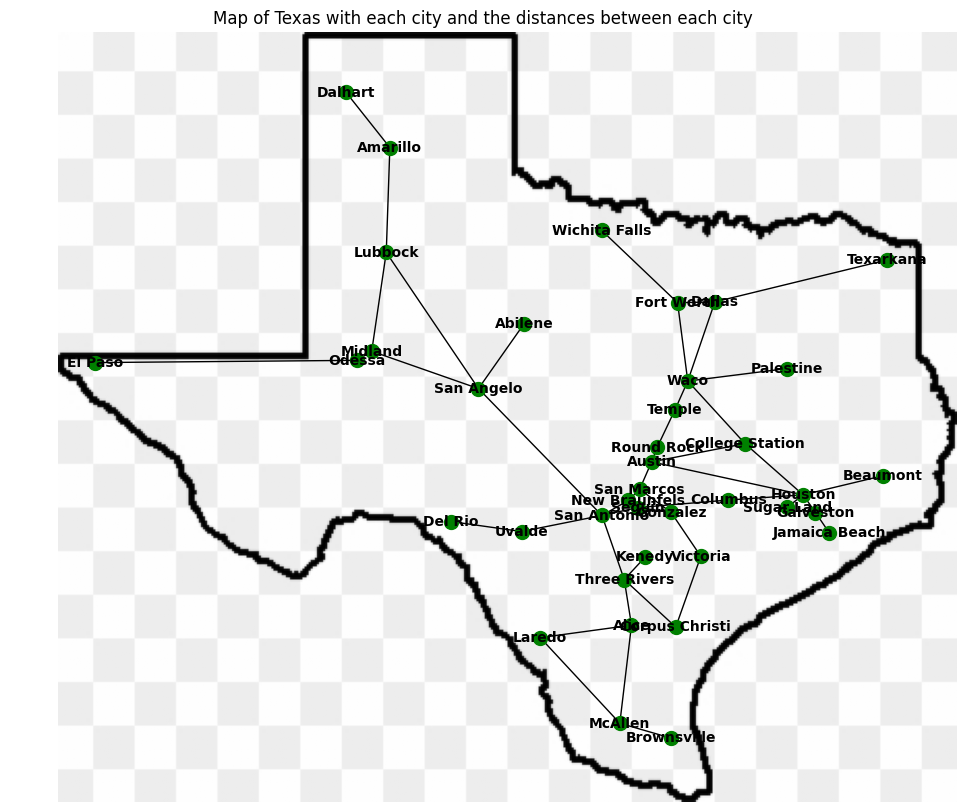

In [18]:
# node_pos holds the positions of each of the nodes in the graph in order to ensure proper alignment
node_pos = nx.get_node_attributes(cities_dist_graph, 'pos')

# calling helper function to create figure containing graph overlayed on texas map image
display_graph(node_pos)

# Providing a title for the figure
plt.title("Map of Texas with each city and the distances between each city")

# Using plt.show() to display the figure
plt.show()


#Virus Spread - Uninformed Search Agent



In [19]:
# defining an uniformed search function using uninformed search algorithm Breadth First Search
# the function takes two arguments
# graph - cities_dist_graph in which the BFS traversal will be performed on
# start - the start node for the BFS traversal which is "Three Rivers"
def uninformed_search_agent_bfs(graph, start):

    visited = set()   # Initialized a set to keep track of nodes that have been visited
    queue = Queue()   # Initialized a queue to perform BFS traversal
    queue.put(start)  # Enqueued the starting node
    total_dist = 0    # Declared and initialized the total distance travelled to calculate the overall distance of path

    # WHILE LOOP used to perform the BFS traveral
    while not queue.empty():

        # Dequeue the current node in iteration
        current_node = queue.get()

        # Check if current_node has not yet been visited
        if current_node not in visited:

            # If true , then add current_node to visited set
            visited.add(current_node)

            # FOR LOOP used to iterate over the neighbors of the current node
            for neighbor in graph.neighbors(current_node):

                # Check if neighbor has not yet been visited
                if neighbor not in visited:
                    # If true, then get the distance (weight) of the edge between the current_node and its neighbor
                    edge_weight = graph[current_node][neighbor]['weight']
                    # Enqueue the neighbor
                    queue.put(neighbor)
                    # Update the total distance after each iteration to get total distance
                    total_dist = total_dist + edge_weight

    # Returns set containing visited nodes, and the total distance (weight) travelled during the BFS traversal
    return visited, total_dist

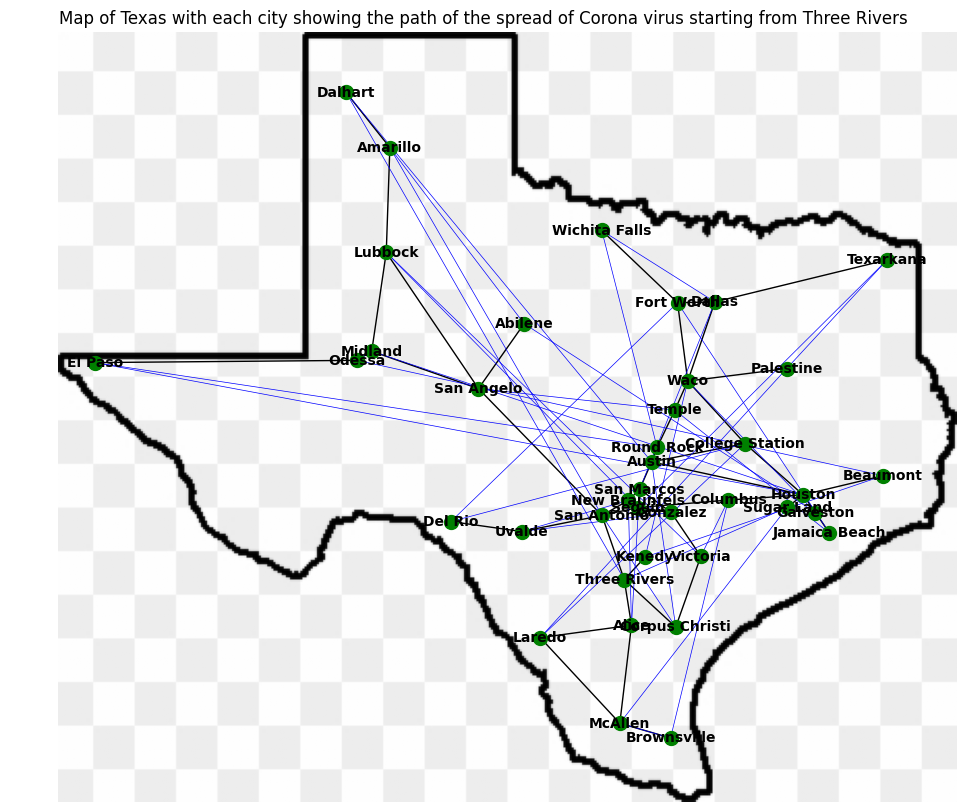

The path or sequence of cities that will be infected by the spread of Coronavirus following Three Rivers : {'San Angelo', 'Temple', 'Jamaica Beach', 'Fort Worth', 'Del Rio', 'College Station', 'Laredo', 'Palestine', 'Texarkana', 'Seguin', 'Lubbock', 'Victoria', 'Columbus', 'Brownsville', 'McAllen', 'Sugar Land', 'Three Rivers', 'Dalhart', 'Austin', 'Corpus Christi', 'San Antonio', 'Amarillo', 'Abilene', 'Galveston', 'Waco', 'Kenedy', 'Beaumont', 'Odessa', 'Midland', 'Houston', 'El Paso', 'Round Rock', 'Wichita Falls', 'Dallas', 'San Marcos', 'Alice', 'New Braunfels', 'Uvalde', 'Gonzalez'}
The distance travelled by the selected virus spreading strategy : 4073.6619521799994


In [20]:
# Calling the uninformed search agent to return the set of nodes (path) and the total distance travelled starting with the node "Three Rivers"
visited_cities, total_dist = uninformed_search_agent_bfs(cities_dist_graph, 'Three Rivers')

# node_pos holds the positions of each of the nodes in the graph
node_pos = nx.get_node_attributes(cities_dist_graph, 'pos')

# Calling helper function to display graph overlayed on texas image map
display_graph(node_pos)

# Coverting the set of visited_cities to a list so we can iterate over it with indexes
visited_cities_list = list(visited_cities)

# Creating a list called path edge that represents the path made by BFS algorithm
path_edges = []

# Using a FOR LOOP to iterate over the list of visited cities (range - 1 to ensure we do not go out of bounds)
for i in range(len(visited_cities_list) - 1):
    # Append a tuple to the list path_edge, which holds the pair of consecutive cities
    path_edges.append((visited_cities_list[i], visited_cities_list[i + 1]))

# Using nx.draw_network_edges() to draw the edges specified in path_edges on to the graph cities_dist_graph
nx.draw_networkx_edges(cities_dist_graph,
                       pos = node_pos,      # Position of nodes
                       edgelist=path_edges, # List of edges using path_edges
                       edge_color='b',      # Edge color is blue
                       width=0.5            # Edge thickness is 0.5
                       )


# Providing a title for the figure
plt.title("Map of Texas with each city showing the path of the spread of Corona virus starting from Three Rivers")

# Using plt.show() to display the figure
plt.show()

# Printing the Path and Distance travelled
print("The path or sequence of cities that will be infected by the spread of Coronavirus following Three Rivers :", visited_cities)
print("The distance travelled by the selected virus spreading strategy :", total_dist)



#Vaccine Transportation - Informed Search Agent


In [21]:
# Calculating Euclidean distance
def euclidean_distance(city1, city2):

    # Extracting coordinates of provided city 1 and city 2
    x1, y1 = cities_dist_graph.nodes[city1]['pos']
    x2, y2 = cities_dist_graph.nodes[city2]['pos']

    # Calculation
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [22]:
# Reconstructing path function used to reconstruct the optimal path from the start to goal node after search algorithm has found the goal node
def reconstruct(current_node, came_from):

    # The current_node is the goal node and is appended to list path
    path = [current_node]

    # Using WHILE loop to check that while the current node has a parent node recorded in the came_from dictionary
    while current_node in came_from:

        # The current node iterates backward to the parent nodes until it reaches the start node
        current_node = came_from[current_node]

        # Each time the current node (parent node) is appended to the list
        path.append(current_node)

    # Path is finally reversed to get the correct order, and then returned
    path.reverse()
    return path

In [23]:
# The A* algorithm is used as an informed search agent to find the optimal path from the start node "San Antonio" to goal node "College Stage"
# The function takes 4 arguments
# graph - cities_dist_graph in which the algorithm will be performed on
# start - start node "San Antonio"
# goal - goal node "College Station"
# heuristic - to estimate the distance (cost) from start to goal to guide the algorithm

def informed_search_agent_astar(graph, start, goal, heuristic):

    # Initialize open_list as a priority queue to store nodes that have to be explore, ordered by estimated total cost
    open_list = []

    # Initialize closed_set as set() to store visited nodes
    closed_set = set()

    # Initialize came_from as a dictionary to store previous node for each node in the optimal path
    came_from = {}

    # Using heappush to add the start node to the open list with priority 0 in order to start the search
    heapq.heappush(open_list, (0, start))

    # Actual_dist is a dictionary to store cost from start to each node
    actual_dist = {}

    # Using FOR LOOP to store each cost from to start to each node
    for node in graph.nodes:
      actual_dist[node] = float('inf')

    # Actual_dist of start is 0 since cost from start to start is 0
    actual_dist[start] = 0

    # Estimate_dist is a dictionary to store cost from start to each node
    estimate_dist = {}

    # Using FOR LOOP to store each cost from to start to each node
    for node in graph.nodes:
      estimate_dist[node] = float('inf')

    # Using heursitic function to estimate cost for the start node
    estimate_dist[start] = heuristic(start, goal)

    # Using WHILE loop to iterate as long as there are nodes in open_list
    while open_list:

      # using heappop to remove the node with lowest priority out of queue
      current_cost, current_node = heapq.heappop(open_list)

      # Check if current_node is equal to goal
      if current_node == goal:

        # If true, then call reconstruct to provide optimal path and its total cost
        return reconstruct(goal, came_from), actual_dist[goal]

      # Add current_node to closed_set to know it has been visited
      closed_set.add(current_node)

      # Using FOR LOOP to explore the neighbors of the current_node
      for neighbor in graph.neighbors(current_node):

        # Check if the neighbor has been visited
        if neighbor in closed_set:

          # If true then skip that neighbor and go to next neighbor (next iteration)
          continue

        # Tentative distance made to check whether a newly discovered path to a node is better than a previous path
        tentative_dist = actual_dist[current_node] + graph[current_node][neighbor]['weight']

        # Check is Tentative distance is less than (less = more optimal ) actual distance
        if tentative_dist < actual_dist[neighbor]:

          # If true,
          # update previous node for neighbor
          came_from[neighbor] = current_node

          # Update cost from start to neighbor
          actual_dist[neighbor] = tentative_dist

          # Update estimated distance
          estimate_dist[neighbor] = tentative_dist + heuristic(neighbor, goal)

          # Add neighbor to open_list
          heapq.heappush(open_list, (estimate_dist[neighbor], neighbor))

    # If no path was found return None,  0 to indicate zero distance since no path was found
    return None, 0


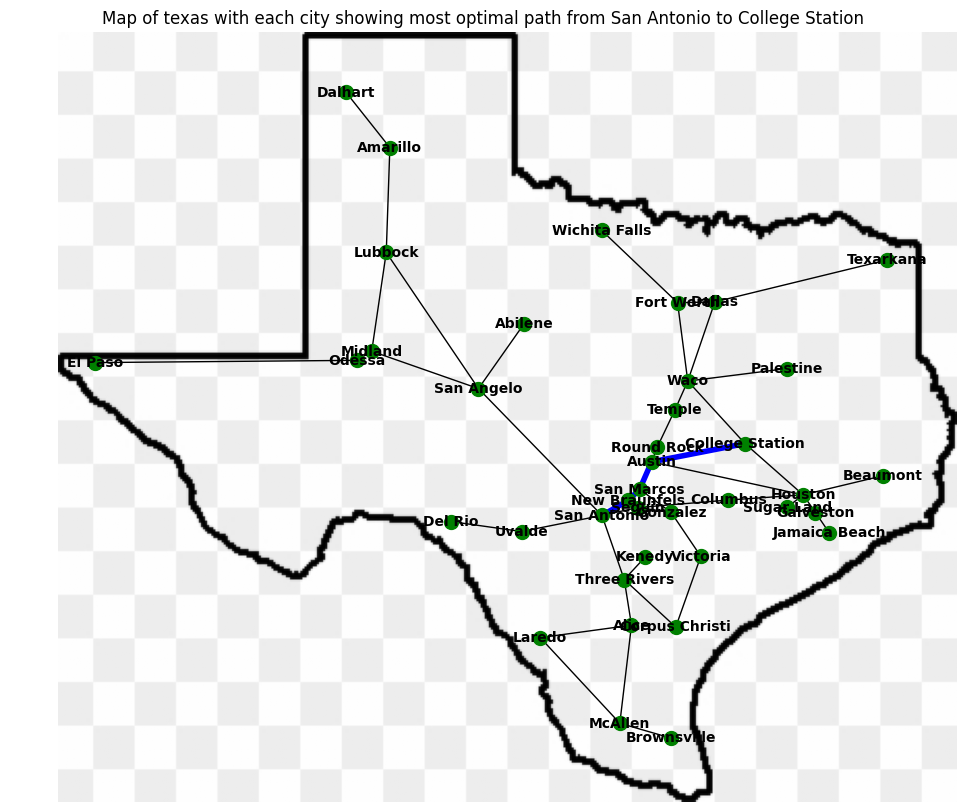

Optimal path from San Antonio to College Station : ['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
Total distance: 186.77450141


In [24]:
# Declaring and initializing start node (start city) as "San Antonio"
start_node = 'San Antonio'

# Declaring and initializing goal node (Destination city) as "College Station"
goal_node = 'College Station'

# The heuristic function we are using is the euclidean_distance function
heuristic = euclidean_distance

# Calling the Informed Search Agent (A* Algorithm)
path, total_distance = informed_search_agent_astar(cities_dist_graph, start_node, goal_node, heuristic)

# node_pos holds the positions of each of the nodes in the graph
node_pos = nx.get_node_attributes(cities_dist_graph, 'pos')

# Calling helper function to display graph overlayed on texas image map
display_graph(node_pos)

# Coverting path to a list so we can iterate over it with indexes
path_list = list(path)

# Creating a list called path_edges that holds the path made by A* Algorithm
path_edges = []

# Using a FOR LOOP to iterate over the list of visited cities (range - 1 to ensure we do not go out of bounds)
for i in range(len(path_list)-1):

  # Append a tuple to the list path_edge, which holds the pair of consecutive cities
  path_edges.append((path_list[i],path_list[i+1]))

# Using nx.draw_network_edges() to draw the edges specified in path_edges on to the graph cities_dist_graph
nx.draw_networkx_edges(cities_dist_graph,
                       pos = node_pos,      # Position of nodes
                       edgelist=path_edges, # List of edges using path_edges
                       edge_color='b',      # Edge color is blue
                       width=4)             # Edge thickness is 4

# Display the plot
plt.title("Map of texas with each city showing most optimal path from San Antonio to College Station")
plt.show()

# Printing the Output that shows the Optimal Path from San Antonio to College Station with the Total Distance travelled
print("Optimal path from", start_node, "to", goal_node, ":", path)
print("Total distance:", total_distance)